# 相关性分析

## 数据的EDA入门
1. 数据属性分布分析(概率密度分析/是否呈现正态分布)
2. 数据属性与Target之间的相关性[correlation]
3. 缺失属性相关性分析--进行合理的填充
4. 构造属性和构造属性的相关性分析

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('datas/los_data.csv')

In [4]:
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

## 相关性分析

In [5]:
tmp=train.isnull().sum()
tmp[tmp>0] #确实的所有列

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
# train.corr()

In [7]:
corr=train.corr()['SalePrice'] # 和房价的相关性
corr[corr>0.5].sort_values()
# OverallQual 装修材料
# GarageCars 车库个数

YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [8]:
## 负相关
corr[corr<0]
# LowQualFinSF 槽点
# KitchenAbvGr 厨房在二楼

Id              -0.021917
MSSubClass      -0.084284
OverallCond     -0.077856
BsmtFinSF2      -0.011378
LowQualFinSF    -0.025606
BsmtHalfBath    -0.016844
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MiscVal         -0.021190
YrSold          -0.028923
Name: SalePrice, dtype: float64

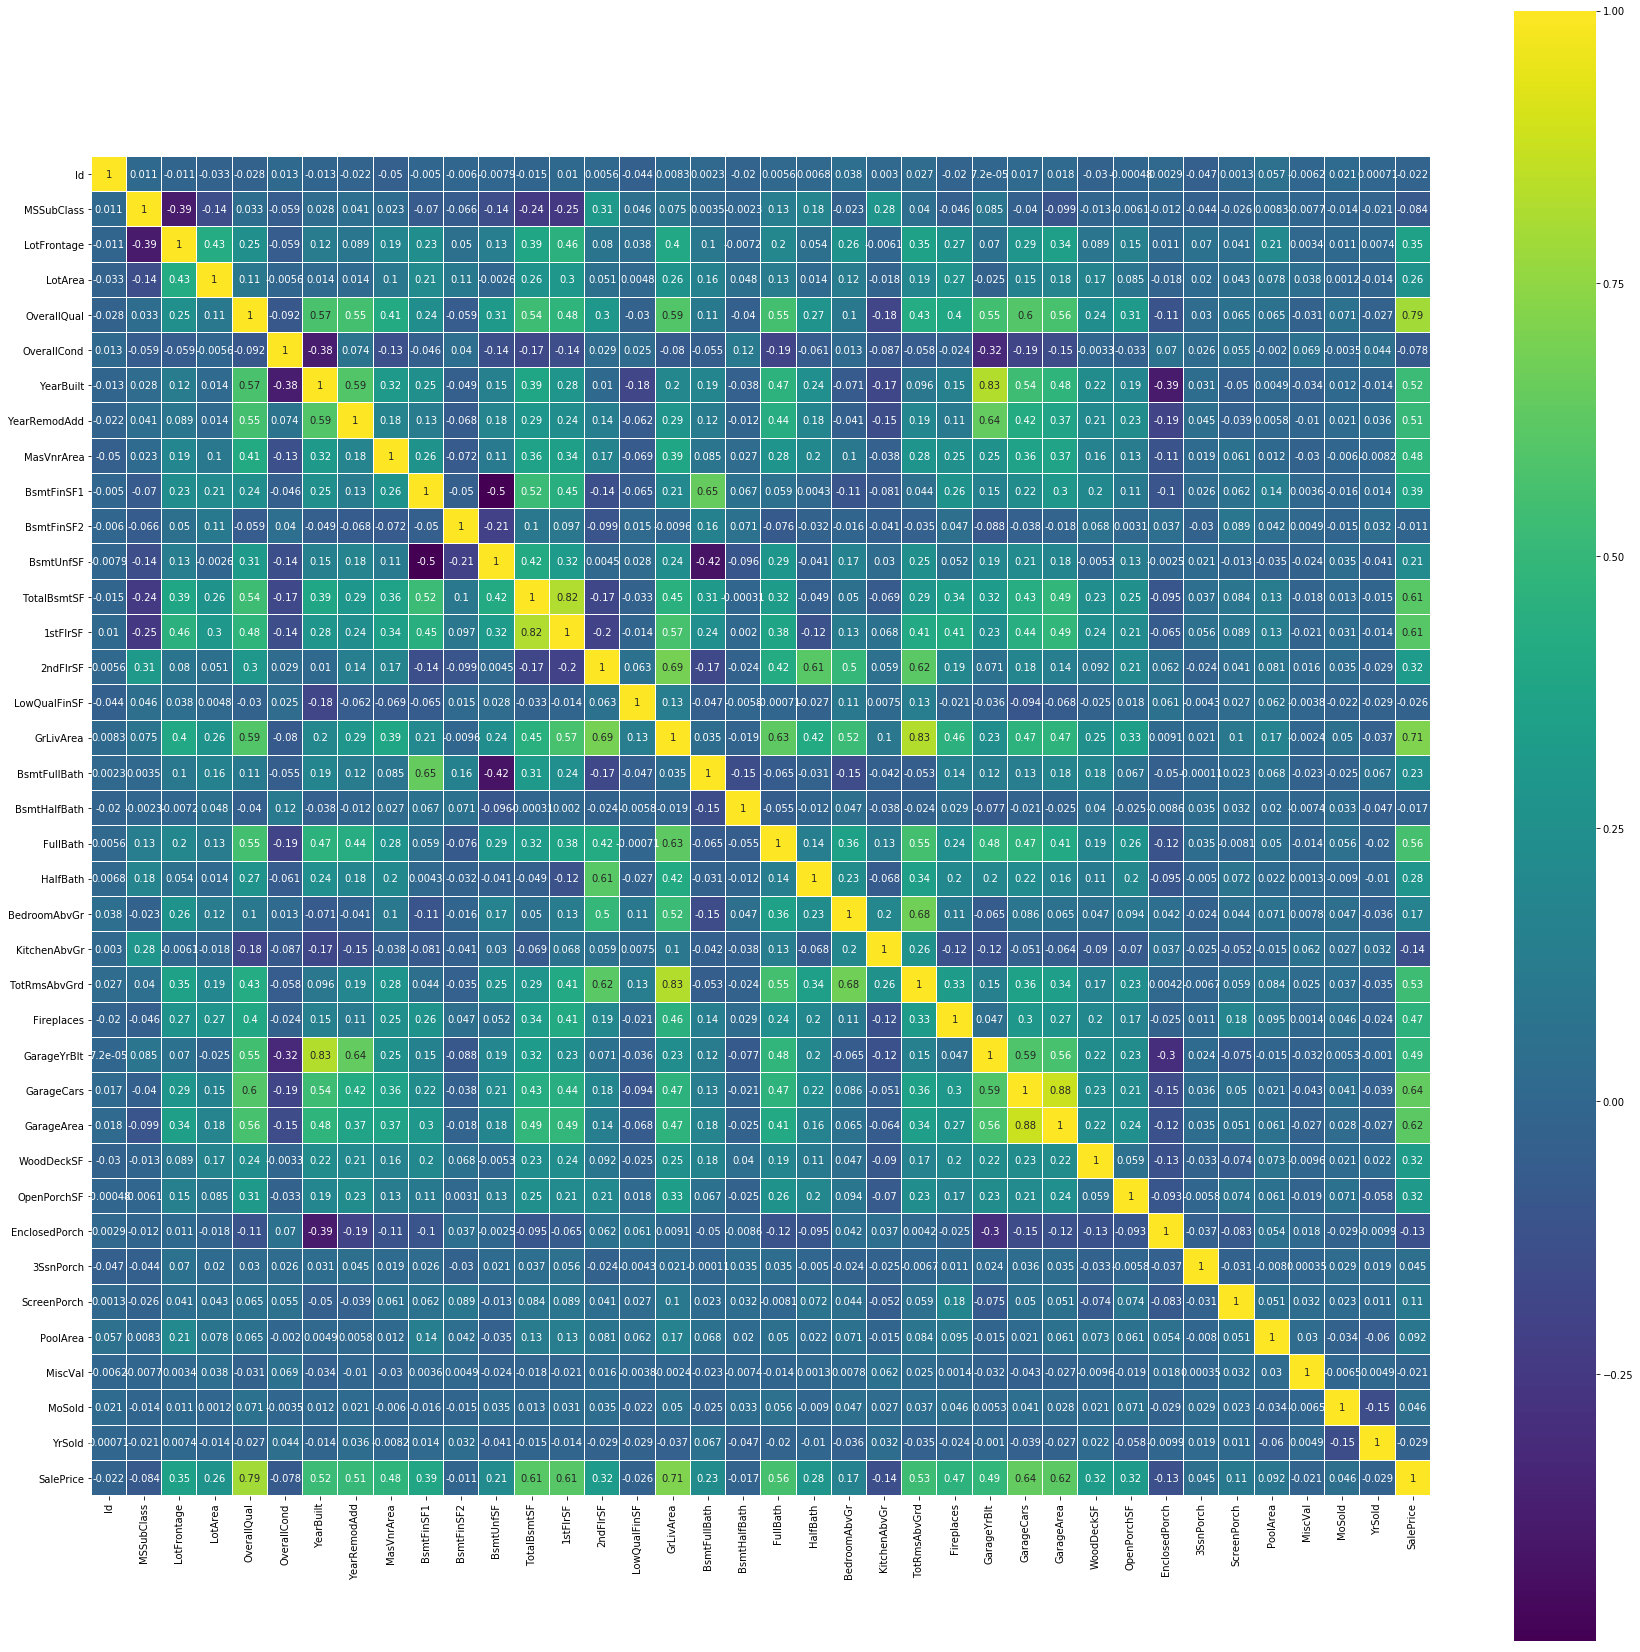

In [9]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(),linewidths=0.01,square=True,cmap='viridis',annot=True)

# 特征观察
观察特征与目标值之间的的关系

使用统计图进行观察

In [18]:
# train.corr()
corr=train.corr()['SalePrice']
corr[corr>0.5]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

## 装修材料对 售价 的影响

装修越好买的越贵

In [43]:
train[['OverallQual', 'SalePrice']].head()

,OverallQual,SalePrice
0,7,208500
1,6,181500
2,7,223500
3,7,140000
4,8,250000


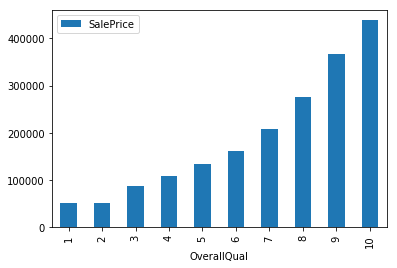

In [20]:
train[['OverallQual', 'SalePrice']].groupby(['OverallQual']).mean().plot.bar()

## 车库  售价 之间的关系

车库越多，房子越好？

车库里能放多少辆车

In [21]:
train[['GarageCars', 'SalePrice']].head()

,GarageCars,SalePrice
0,2,208500
1,2,181500
2,2,223500
3,3,140000
4,3,250000


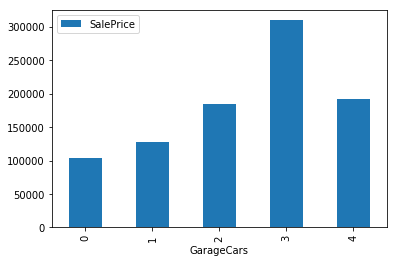

In [22]:
train[['GarageCars', 'SalePrice']].groupby(['GarageCars']).mean().plot.bar()

## 不要将连续的数据进行groupby

这样做没有意义

对GarageArea 进行groupby,每个Area分成一类数不清！

连续数据，几乎没有相同的，分N类

如果想要对连续性的数据进行，就需要对数据进行采样、分级

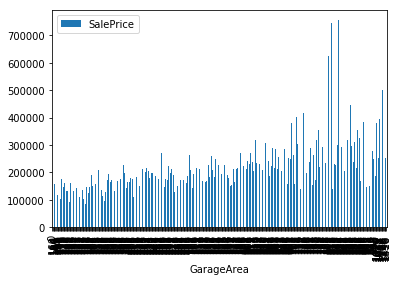

In [45]:
train[['GarageArea', 'SalePrice']].groupby(['GarageArea']).mean().plot.bar()

In [48]:
train[['GarageArea', 'SalePrice']].groupby(['GarageArea']).mean().count()

SalePrice    441
dtype: int64

## 车辆数 和 车库面积 的关系

车库能在装4辆车，和车库能在装3辆车差不多大，挤一挤

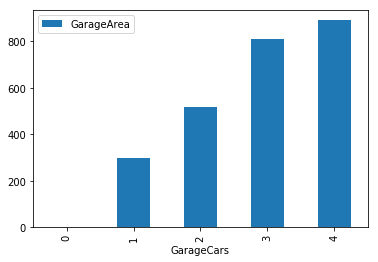

In [24]:
# 中位数 median
train[['GarageCars', 'GarageArea']].groupby(['GarageCars']).mean().plot.bar()

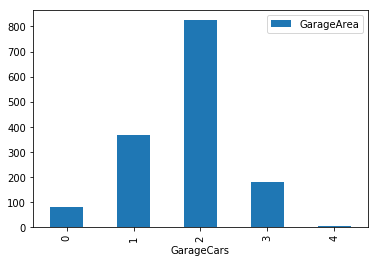

In [25]:
# 容纳2辆车的房子 是最多的
train[['GarageCars', 'GarageArea']].groupby(['GarageCars']).count().plot.bar()

In [26]:
train['GarageCars'].corr(train['GarageArea'])

0.8824754142814625

In [57]:
# 相似度矩阵，相关系数，皮尔森系数
np.corrcoef(train['GarageCars'], train['GarageArea'])

array([[1.        , 0.88247541],
       [0.88247541, 1.        ]])

<br><br>

#  正相关数据分析

OverallQual 装修质量

YearBuilt 建筑年代

YearRcemodAdd 重新改造时间(晚于或者等于建筑时间)

TotalBsmtSF 地下室的面积

1stFlrSF 1楼面积

GrLivArea 地上整体面积

FullBath 总体卫生间数量

TotRmsAbvGrd 总体卧室数量

GarageCars 车库容车量

GarageArea 车库面积

In [50]:
corr = train.corr()['SalePrice']
corr[corr>0.5].sort_values()

YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

## OverallQual 与 SalePrice 的相关性分析

装修越好，售价越高吗？

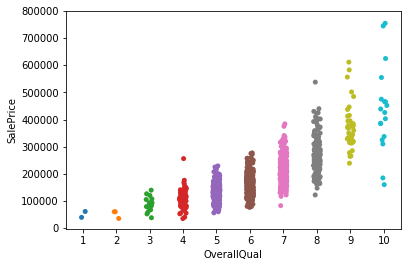

In [27]:
sns.stripplot('OverallQual', 'SalePrice', data=train)

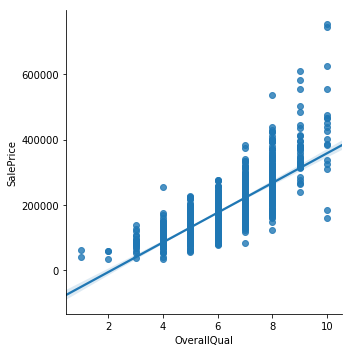

In [49]:
# 装修材料 对 房价的影响 
# 拟合一条直线
sns.lmplot('OverallQual', 'SalePrice', data=train)

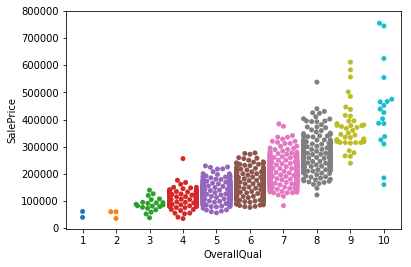

In [28]:
sns.swarmplot('OverallQual', 'SalePrice', data=train)

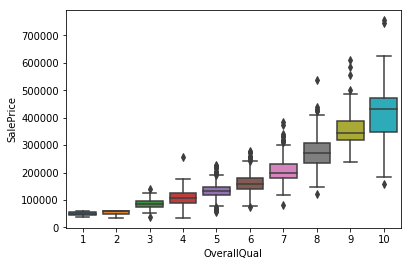

In [29]:
sns.boxplot('OverallQual', 'SalePrice', data=train)

In [32]:
# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")

[作业：]请大家分析SalePrice 与 corr>0.5的变量的关系以及corr<0的变量之间的关系，请说明分析理由

#scatter, jointplot

## GrLivArea 和 售价的关系

地上整体面积越大 售价越高吗？

In [54]:
train['GrLivArea'].corr(train['SalePrice'])

0.7086244776126523

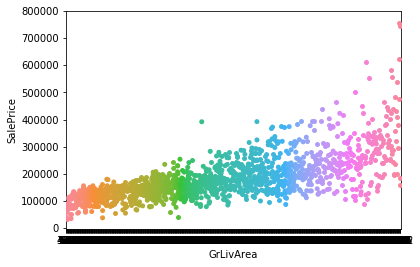

In [73]:
sns.stripplot('GrLivArea', 'SalePrice', data=train)

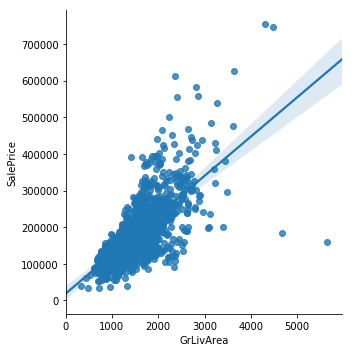

In [56]:
sns.lmplot('GrLivArea', 'SalePrice', data=train)

## TotRmsAbvGrd 和 售价的关系

总体卧室数量 越多 售价越高吗 ？

In [60]:
np.corrcoef(train['TotRmsAbvGrd'], train['SalePrice'])

array([[1.        , 0.53372316],
       [0.53372316, 1.        ]])

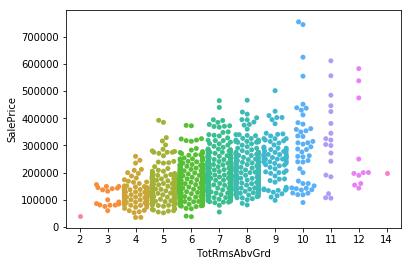

In [72]:
sns.swarmplot('TotRmsAbvGrd', 'SalePrice', data=train)

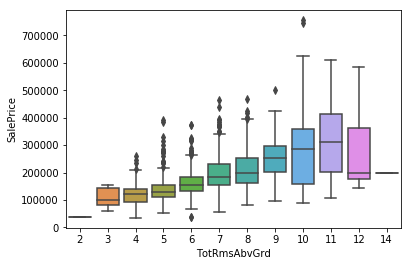

In [63]:
sns.boxplot('TotRmsAbvGrd', 'SalePrice', data=train)

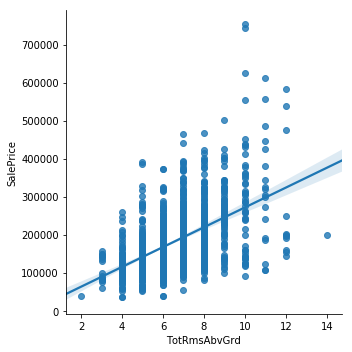

In [74]:
sns.lmplot('TotRmsAbvGrd', 'SalePrice', data=train)

# 负相关数据分析


In [53]:
corr=train.corr()['SalePrice']
corr[corr<0]

Id              -0.021917
MSSubClass      -0.084284
OverallCond     -0.077856
BsmtFinSF2      -0.011378
LowQualFinSF    -0.025606
BsmtHalfBath    -0.016844
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MiscVal         -0.021190
YrSold          -0.028923
Name: SalePrice, dtype: float64

## KitchenAbvGr 和售价的关系

KitchenAbvGr 在二楼以上，售价就低吗？

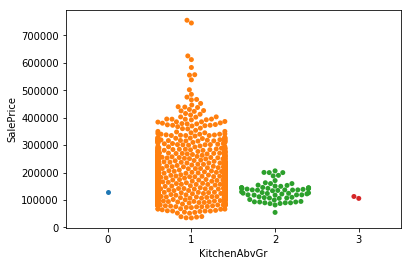

In [76]:
sns.swarmplot('KitchenAbvGr', 'SalePrice', data=train)

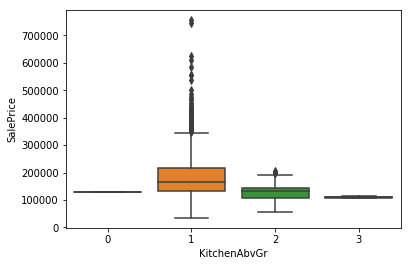

In [78]:
sns.boxplot('KitchenAbvGr', 'SalePrice', data=train)

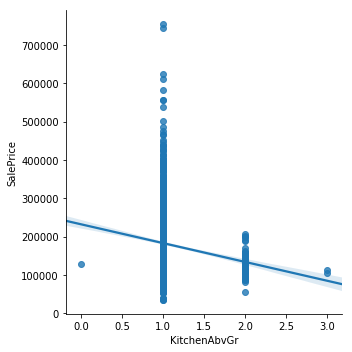

In [77]:
sns.lmplot('KitchenAbvGr', 'SalePrice', data=train)

<br><br><br>

# Seaborn 测试代码

In [32]:
import warnings
warnings.filterwarnings("ignore")

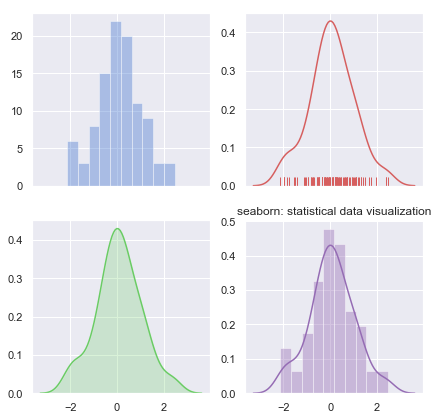

In [33]:
sns.set( palette="muted", color_codes=True)
rs = np.random.RandomState(10)
d = rs.normal(size=100)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)

plt.title('seaborn: statistical data visualization')
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(d, color="m", ax=axes[1, 1])

plt.show()